<a href="https://colab.research.google.com/github/ShedovaNastya/Introduction-in-ML/blob/main/2_2Gender_Recognition_by_Voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Загрузка данных
url = "/content/voice.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

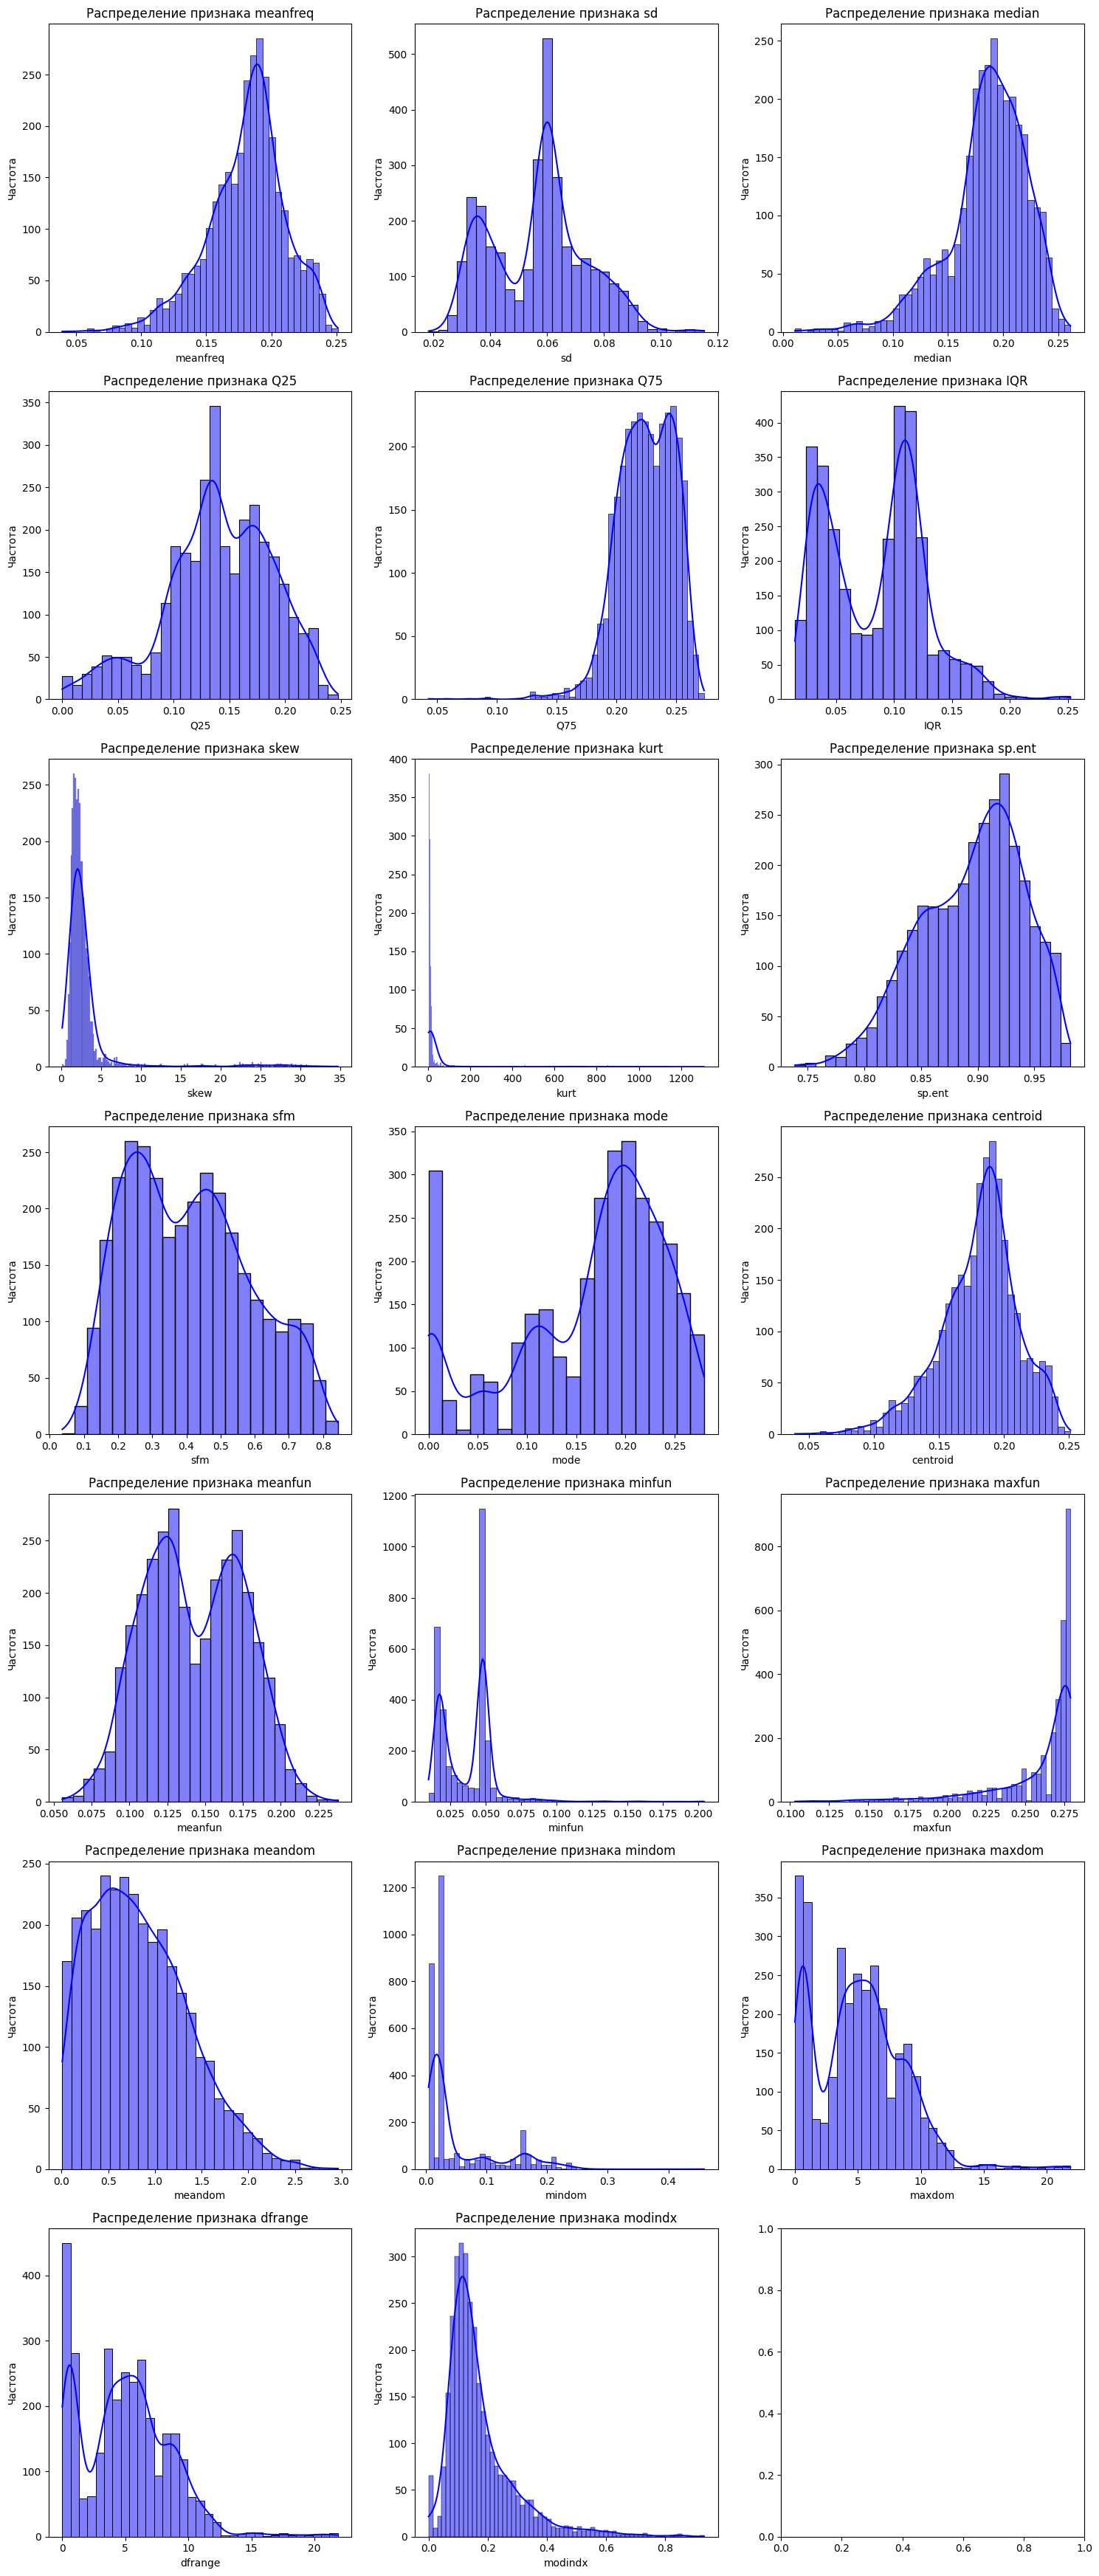

In [44]:
features = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

# Определение размеров сетки графиков
num_rows = (len(features) + 2) // 3  # Количество строк в сетке
num_cols = min(len(features), 3)  # Количество столбцов в сетке

# Создание окна с несколькими графиками
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Заполнение графиков данными
for i, feature in enumerate(features):
    row = (i // num_cols) % num_rows
    col = i % num_cols
    sns.histplot(data[feature], kde=True, ax=axes[row, col], color='blue')
    axes[row, col].set_title(f'Распределение признака {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Частота')


# Автоматическое выравнивание графиков
plt.tight_layout()
plt.show()

In [30]:
print(X.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0  0.27586

In [6]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [13]:
X = data.drop("label", axis=1)
y = data["label"]

In [7]:
def generate_batches(X, y, batch_size):
    """
    param X: np.array[n_objects, n_features] --- матрица объекты-признаки
    param y: np.array[n_objects] --- вектор целевых переменных
    """
    assert len(X) == len(y)# Проверка, что количество объектов в X и y одинаково
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X)) # Создание перестановки индексов для перемешивания данных

    for batch_start in range(0, len(X) - batch_size + 1, batch_size):# Цикл по батчам
        batch_indices = perm[batch_start:batch_start + batch_size]# Выбор индексов для текущего батча из перемешанных индексов
        Xbatch = X[batch_indices]
        ybatch = y[batch_indices]
        yield Xbatch, ybatch# Возвращение батча в виде кортежа (Xbatch, ybatch)

In [8]:
def logit(x, w):#Вычисляет линейную комбинацию признаков и весов
    return np.dot(x, w)

def sigmoid(h):#Применяет сигмоидную функцию к линейной комбинации
    return 1. / (1 + np.exp(-h))

In [40]:
class MyLogisticRegression(object):
    def __init__(self):
        self.w = None

    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
        l, n = X.shape
        if self.w is None:
            np.random.seed(42)
            # Вектор столбец в качестве весов
            self.w = np.random.randn(n + 1)# Инициализируем веса случайными значениями

        X_train = np.concatenate((np.ones((l, 1)), X), axis=1)# Добавляем колонку единиц для смещения (bias)

        losses = []

        for i in range(epochs):
            for X_batch, y_batch in generate_batches(X_train, y, batch_size):

                predictions = self._predict_proba_internal(X_batch)
                loss = self.__loss(y_batch, predictions)

                assert (np.array(loss).shape == tuple()), "Лосс должен быть скаляром!"

                losses.append(loss)

                grad = self.get_grad(X_batch, y_batch, predictions)
                self.w -= lr * grad# Обновляем веса с помощью градиентного спуска

        return losses# Возвращаем список значений потерь


    def get_grad(self, X_batch, y_batch, predictions):
        """
        param X_batch: np.array[batch_size, n_features + 1] --- матрица объекты-признаки
        param y_batch: np.array[batch_size] --- батч целевых переменных
        param predictions: np.array[batch_size] --- батч вероятностей классов

        Принимает на вход X_batch с уже добавленной колонкой единиц.
        Выдаёт градиент функции потерь в логистической регрессии
        как сумму градиентов функции потерь на всех объектах батча
        ВНИМАНИЕ! Нулевая координата вектора весов -- это BIAS, а не вес признака.
        Также не нужно ДЕЛИТЬ ГРАДИЕНТ НА РАЗМЕР БАТЧА:
        нас интересует не среднее, а сумма.
        В качестве оператора умножения матриц можно использовать @

        Выход -- вектор-столбец градиентов для каждого веса (np.array[n_features + 1])
        """
        grad_basic = np.sum((predictions - y_batch)[:, np.newaxis] * X_batch, axis=0)
        assert grad_basic.shape == (X_batch.shape[1],), "Градиенты должны быть столбцом из n_features + 1 элементов"

        return grad_basic

    def predict_proba(self, X):
        l, n = X.shape
        X_ = np.concatenate((np.ones((l, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def _predict_proba_internal(self, X):
        """
        Возможно, вы захотите использовать эту функцию вместо predict_proba, поскольку
        predict_proba конкатенирует вход с вектором из единиц, что не всегда удобно
        для внутренней логики вашей программы
        Внутренний метод для вычисления предсказанных вероятностей без добавления колонки единиц.
        """
        return sigmoid(logit(X, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

    def get_weights(self):
        return self.w.copy()
        # copy тут используется неспроста. Если copy не использовать, то get_weights()
        # выдаст ссылку на объект, а, значит, модифицируя результат применения функции
        # get_weights(), вы модифицируете и веса self.w. Если вы хотите модифицировать веса,
        # (например, в fit), используйте self.w
        # Возвращаем копию текущих весов


    def loss(self, y, p):
        y = np.array(y, dtype=np.float64)
        p = np.array(p, dtype=np.float64)
        return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

In [41]:
class MyElasticLogisticRegression(MyLogisticRegression):
    def __init__(self, l1_coef, l2_coef):
        self.l1_coef = l1_coef  # Коэффициент L1-регуляризации
        self.l2_coef = l2_coef  # Коэффициент L2-регуляризации
        self.w = None  # Инициализация весов модели

    def get_grad(self, X_batch, y_batch, predictions):
        """
        Принимает на вход X_batch с уже добавленной колонкой единиц.
        Выдаёт градиент функции потерь в логистической регрессии с регуляризаторами
        как сумму градиентов функции потерь на всех объектах батча + регуляризационное слагаемое
        ВНИМАНИЕ! Нулевая координата вектора весов -- это BIAS, а не вес признака.
        Bias в регуляризационные слагаемые не входит. Также не нужно ДЕЛИТЬ ГРАДИЕНТ НА РАЗМЕР БАТЧА:
        нас интересует не среднее, а сумма.

        Выход -- вектор-столбец градиентов для каждого веса (np.array[n_features + 1])
        """

        grad_basic = np.sum((predictions - y_batch)[:, np.newaxis] * X_batch, axis=0) # Компонент градиента из логистической регрессии


        grad_l1 = np.sign(self.w) * self.l1_coef # Компонент градиента из L1-регуляризации
        grad_l1[0] = 0  # Обнуляем компоненту с bias, так как bias не должен входить в регуляризацию


        grad_l2 = 2 * self.w * self.l2_coef# Компонент градиента из L2-регуляризации
        grad_l2[0] = 0  # Обнуляем компоненту с bias

        # Проверка, что bias-компонента обнулена в регуляризационных градиентах

        assert grad_l1[0] == grad_l2[0] == 0, "Bias в регуляризационные слагаемые не входит!"

        assert grad_basic.shape == grad_l1.shape == grad_l2.shape == (X_batch.shape[1],), "Градиенты должны быть столбцом из k_features + 1 элементов"

        return grad_basic + grad_l1 + grad_l2# Возвращаем сумму всех компонентов градиента

    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
          l, n = X.shape
          if self.w is None:
              np.random.seed(42)
              self.w = np.random.randn(n + 1)

          X_train = np.concatenate((np.ones((l, 1)), X), axis=1)

          losses = []

          for i in range(epochs):
              for X_batch, y_batch in generate_batches(X_train, y, batch_size):
                  predictions = self._predict_proba_internal(X_batch)
                  loss = self.loss(y_batch, predictions)
                  losses.append(loss)
                  grad = self.get_grad(X_batch, y_batch, predictions)
                  self.w -= lr * grad

          return losses

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Предположим, что data - ваш DataFrame, содержащий все переменные
X = data.drop("label", axis=1)  # Признаки
# y = data["label"]  # Целевая переменная

# Создаем пайплайн, который нормализует признаки и затем обучает модель
pipeline = make_pipeline(
    StandardScaler(),  # Нормализация признаков X
    MyElasticLogisticRegression(l1_coef=0.1, l2_coef=0.1)
)

# Оценка модели с помощью cross_val_score
scores = cross_val_score(pipeline, X, y_encoded, cv=5, scoring='accuracy')
mean_accuracy = scores.mean()

print(f"Mean accuracy of Elastic Logistic Regression is {mean_accuracy}")

Mean accuracy of Elastic Logistic Regression is 0.7418422114910221


<ipython-input-40-9825321e3c68>:82: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
<ipython-input-40-9825321e3c68>:82: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
<ipython-input-40-9825321e3c68>:82: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
<ipython-input-40-9825321e3c68>:82: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
<ipython-input-40-9825321e3c68>:82: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
<ipython-input-40-9825321e3c68>:82: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
<ipython-input-40-9825321e3c68>:82: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - 